In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib notebook
plt.rcParams.update({'font.size': 13})

In [3]:
# brute : GTX 1070
#t_1024 = [0.627, 0.244, 0.264, 0.254, 0.280]
#t_4096 = [7.763, 2.103, 0.852, 0.865, 1.091]
#t_16384 = [122.138, 31.028, 11.458, 8.626, 9.544]
#t_65536 = [2034.802, 499.169, 181.769, 135.122, 149.830]

# brute : Tesla K40
t_1024 = [0.548, 0.453, 0.467, 0.450, 0.461]
t_4096 = [10.258, 2.80, 0.94, 0.948, 0.949]
t_16384 = [158.713, 40.19, 10.679, 3.179, 3.303]
t_65536 = [2543.66, 643.444, 170.822, 46.42, 47.31]


nbthreads = [256, 1024, 4096, 16384, 65535]

In [4]:
def power(my_list):
    return [ 10**x for x in my_list ]

In [5]:
reg_1024 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_1024))
reg_4096 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_4096))
reg_16384 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_16384))
reg_65536 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_65536))

<IPython.core.display.Javascript object>


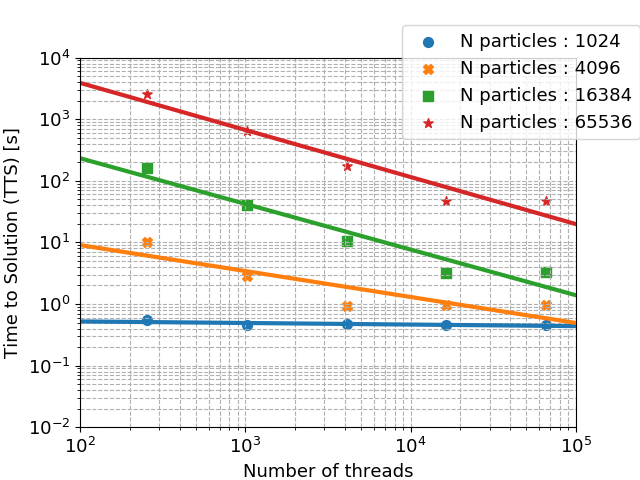

In [6]:
fig = plt.figure()
xp = np.logspace(2,5,100)

plt.scatter(nbthreads, t_1024, label='N particles : 1024', marker='o',s=50)
plt.scatter(nbthreads, t_4096, label='N particles : 4096', marker='X',s=50)
plt.scatter(nbthreads, t_16384, label='N particles : 16384', marker='s',s=50)
plt.scatter(nbthreads, t_65536, label='N particles : 65536', marker='*',s=50)

plt.plot(xp, power(reg_1024.coef_[0]*np.log10(xp) + reg_1024.intercept_), '-', linewidth=3)
plt.plot(xp, power(reg_4096.coef_[0]*np.log10(xp) + reg_4096.intercept_), '-', linewidth=3)
plt.plot(xp, power(reg_16384.coef_[0]*np.log10(xp) + reg_16384.intercept_), '-', linewidth=3)
plt.plot(xp, power(reg_65536.coef_[0]*np.log10(xp) + reg_65536.intercept_), '-', linewidth=3)

plt.legend(loc=(0.65, 0.78))
plt.ylim( (10**-2,10**4) )
plt.xlim( (10**2,10**5) )
plt.grid(True, which="both",linestyle='--')

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time to Solution (TTS) [s]')
plt.show()
#plt.savefig('figs/brute_tts_tesla.png')